In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings('ignore') 
sns.set()

## Importing dataset
    1.Since data is in form of excel file we have to use pandas read_excel to load the data
    2.After loading it is important to check the complete information of data as it can indication 
    many of the hidden infomation such as null values in a column or a row
    3.Check whether any null values are there or not. if it is present then following can be done,
        a.Imputing data using Imputation method in sklearn
        b.Filling NaN values with mean, median and mode using fillna() method
    4.Describe data --> which can give statistical analysis

In [2]:
train_data = pd.read_excel('D:\STUDIES\DATASETS\Agriculture Consignment Vehicle Fare Prediction\Agriculture Consignment dataset(ACP).xlsx')
train_data.head()

,S.No,Pickup Datetime,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount
0,1,2015-01-27 13:08:24 IST,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407,3575
1,2,2015-01-27 13:08:24 IST,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape,266
2,3,2011-10-08 11:53:44 IST,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape,190
3,4,2012-12-01 21:12:12 IST,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407,715
4,5,2012-12-01 21:12:12 IST,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407,520


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               200 non-null    int64  
 1   Pickup Datetime    200 non-null    object 
 2   Pickup Latitude	   200 non-null    float64
 3   Pickup Longitude   200 non-null    float64
 4   Village Name       200 non-null    object 
 5   Dropoff Latitude	  200 non-null    float64
 6   Dropoff Longitude  200 non-null    float64
 7   Market Name        200 non-null    object 
 8   Kilometer          200 non-null    int64  
 9   Weight             200 non-null    object 
 10  Vehicle Type       200 non-null    object 
 11  Fare Amount        200 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 18.9+ KB


In [4]:
train_data.isnull().sum()

S.No                  0
Pickup Datetime       0
Pickup Latitude\t     0
Pickup Longitude      0
Village Name          0
Dropoff Latitude\t    0
Dropoff Longitude     0
Market Name           0
Kilometer             0
Weight                0
Vehicle Type          0
Fare Amount           0
dtype: int64

EDA
    
    From description we can see that Date_of_Journey is a object data type,
    Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

    For this we require pandas to_datetime to convert object data type to datetime dtype.

    .dt.day method will extract only day of that date
    .dt.month method will extract only month of that date

In [5]:
import datetime

In [6]:
pd.to_datetime(train_data['Pickup Datetime'])

0     2015-01-27 13:08:24
1     2015-01-27 13:08:24
2     2011-10-08 11:53:44
3     2012-12-01 21:12:12
4     2012-12-01 21:12:12
              ...        
195   2011-05-21 13:16:20
196   2011-11-25 16:36:24
197   2011-11-25 16:36:24
198   2015-01-31 20:54:04
199   2010-11-01 23:31:28
Name: Pickup Datetime, Length: 200, dtype: datetime64[ns]

In [7]:
train_data['Pickup Datetime'] = pd.to_datetime(train_data['Pickup Datetime'])-datetime.timedelta(hours=4)
print(train_data['Pickup Datetime'])

0     2015-01-27 09:08:24
1     2015-01-27 09:08:24
2     2011-10-08 07:53:44
3     2012-12-01 17:12:12
4     2012-12-01 17:12:12
              ...        
195   2011-05-21 09:16:20
196   2011-11-25 12:36:24
197   2011-11-25 12:36:24
198   2015-01-31 16:54:04
199   2010-11-01 19:31:28
Name: Pickup Datetime, Length: 200, dtype: datetime64[ns]


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   S.No               200 non-null    int64         
 1   Pickup Datetime    200 non-null    datetime64[ns]
 2   Pickup Latitude	   200 non-null    float64       
 3   Pickup Longitude   200 non-null    float64       
 4   Village Name       200 non-null    object        
 5   Dropoff Latitude	  200 non-null    float64       
 6   Dropoff Longitude  200 non-null    float64       
 7   Market Name        200 non-null    object        
 8   Kilometer          200 non-null    int64         
 9   Weight             200 non-null    object        
 10  Vehicle Type       200 non-null    object        
 11  Fare Amount        200 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 18.9+ KB


In [9]:
train_data.head()

,S.No,Pickup Datetime,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount
0,1,2015-01-27 09:08:24,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407,3575
1,2,2015-01-27 09:08:24,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape,266
2,3,2011-10-08 07:53:44,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape,190
3,4,2012-12-01 17:12:12,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407,715
4,5,2012-12-01 17:12:12,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407,520


In [10]:
train_data['Pickup Datetime'].dt.month

0       1
1       1
2      10
3      12
4      12
       ..
195     5
196    11
197    11
198     1
199    11
Name: Pickup Datetime, Length: 200, dtype: int64

In [11]:
train_data['Year'] = train_data['Pickup Datetime'].dt.year
train_data['Month'] = train_data['Pickup Datetime'].dt.month
train_data['Day'] = train_data['Pickup Datetime'].dt.day
train_data['Hours'] = train_data['Pickup Datetime'].dt.hour
train_data['Minutes'] = train_data['Pickup Datetime'].dt.minute

In [12]:
train_data['mornight']=np.where(train_data['Hours']<12,0,1)

In [13]:
train_data.head()

,S.No,Pickup Datetime,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount,Year,Month,Day,Hours,Minutes,mornight
0,1,2015-01-27 09:08:24,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407,3575,2015,1,27,9,8,0
1,2,2015-01-27 09:08:24,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape,266,2015,1,27,9,8,0
2,3,2011-10-08 07:53:44,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape,190,2011,10,8,7,53,0
3,4,2012-12-01 17:12:12,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407,715,2012,12,1,17,12,1
4,5,2012-12-01 17:12:12,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407,520,2012,12,1,17,12,1


In [14]:
train_data.drop('Pickup Datetime',axis=1,inplace=True)

In [15]:
train_data.head()

,S.No,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount,Year,Month,Day,Hours,Minutes,mornight
0,1,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407,3575,2015,1,27,9,8,0
1,2,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape,266,2015,1,27,9,8,0
2,3,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape,190,2011,10,8,7,53,0
3,4,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407,715,2012,12,1,17,12,1
4,5,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407,520,2012,12,1,17,12,1


In [16]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
maniyampattu =[12.226787,79.516198]
kanai = [11.954979,79.419145]

In [17]:
maniyampattu_in_radians = [radians(_) for _ in maniyampattu]
kanai_in_radians = [radians(_) for _ in kanai]

In [18]:
result = haversine_distances([maniyampattu_in_radians,kanai_in_radians])

In [19]:
result*6371

array([[ 0.       , 32.0128602],
       [32.0128602,  0.       ]])

In [20]:
np.radians(train_data['Dropoff Latitude\t']-train_data['Pickup Latitude\t'])

0     -0.004744
1     -0.000150
2     -0.000491
3     -0.001043
4      0.000317
         ...   
195    0.000531
196    0.000235
197    0.000654
198    0.000860
199    0.000485
Length: 200, dtype: float64

In [21]:
def haversine(train_data):
    
    lat1 = np.radians(train_data["Pickup Latitude\t"])
    lat2 = np.radians(train_data["Dropoff Latitude\t"])

    dlat = np.radians(train_data['Dropoff Latitude\t']-train_data['Pickup Latitude\t'])
    dlong = np.radians(train_data['Dropoff Longitude']-train_data['Pickup Longitude'])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371
    return c * r

In [22]:
train_data['Total distance'] = haversine(train_data)

In [23]:
train_data.head()

,S.No,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,1,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407,3575,2015,1,27,9,8,0,32.012835
1,2,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape,266,2015,1,27,9,8,0,2.525760
2,3,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape,190,2011,10,8,7,53,0,3.126972
3,4,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407,715,2012,12,1,17,12,1,7.692249
4,5,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407,520,2012,12,1,17,12,1,5.758027


Handling Categorical Data
    
    One can find many ways to handle categorical data. Some of them categorical data are,

    1.Nominal data --> data are not in any order --> OneHotEncoder is used in this case
    2.Ordinal data --> data are in order --> LabelEncoder is used in this case

In [24]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
train_data['Vehicle Type']= label_encoder.fit_transform(train_data['Vehicle Type']) 
train_data['Village Name']= label_encoder.fit_transform(train_data['Village Name'])
train_data['Market Name']= label_encoder.fit_transform(train_data['Market Name'])
train_data['Weight']= label_encoder.fit_transform(train_data['Weight'])

train_data['Vehicle Type'].unique() 
train_data['Village Name'].unique()
train_data['Market Name'].unique()
train_data['Weight'].unique()

array([ 41,  86,  80,  14, 105,  90,  92, 103,   7,   2,   0,  27,  40,
        81,  71, 108, 116,   3, 110,   5,  67,  20,   8,  10,  12, 118,
        84,  77,  89,  13,  58,  33,  44,  98,  76,  21,  38,  61,  87,
        65,  66, 100,  36,  79,  88,  35, 102,   9,  24,  73,  68,  83,
        60,  97,  52,  72, 101,  63,  47,  19,  34,  50,  28,  75,  69,
        64,  45,  23,  18, 115,  32,  31, 109,   1,  95,  49,  78,  15,
        11, 107,  70,  99, 112, 106,  82,  43,  26,   6,  85,  39,  48,
        37,  74,  42,  25,  16,  17,  22,  30,   4, 104,  96, 111,  94,
        91,  93, 119, 113, 114, 117,  29,  54,  56,  55,  51,  46,  53,
        57,  59,  62])

In [25]:
train_data.head()

,S.No,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,1,12.226787,79.516198,91,11.954979,79.419145,1,55,41,2,3575,2015,1,27,9,8,0,32.012835
1,2,11.963588,79.440631,0,11.954979,79.419145,1,7,86,4,266,2015,1,27,9,8,0,2.525760
2,3,11.983094,79.418524,3,11.954979,79.419145,1,5,80,4,190,2011,10,8,7,53,0,3.126972
3,4,12.014724,79.383495,10,11.954979,79.419145,1,11,14,2,715,2012,12,1,17,12,1,7.692249
4,5,11.936798,79.369585,40,11.954979,79.419145,1,8,41,2,520,2012,12,1,17,12,1,5.758027


In [26]:
train_data.drop(['S.No','Pickup Latitude\t','Pickup Longitude','Dropoff Latitude\t','Dropoff Longitude'],axis=1,inplace=True)

In [27]:
train_data.head()

,Village Name,Market Name,Kilometer,Weight,Vehicle Type,Fare Amount,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,91,1,55,41,2,3575,2015,1,27,9,8,0,32.012835
1,0,1,7,86,4,266,2015,1,27,9,8,0,2.525760
2,3,1,5,80,4,190,2011,10,8,7,53,0,3.126972
3,10,1,11,14,2,715,2012,12,1,17,12,1,7.692249
4,40,1,8,41,2,520,2012,12,1,17,12,1,5.758027


In [28]:
test_data = pd.read_excel("D:\STUDIES\DATASETS\Agriculture Consignment Vehicle Fare Prediction\Agriculture Consignment dataset(ACP) Test.xlsx")
test_data.head()

,S.No,Pickup Datetime,Pickup Latitude\t,Pickup Longitude,Village Name,Dropoff Latitude\t,Dropoff Longitude,Market Name,Kilometer,Weight,Vehicle Type
0,1,2015-01-27 13:08:24 IST,12.226787,79.516198,"Maniyampattu, Tamil Nadu",11.954979,79.419145,Kanai,55,2500 kg,Tata 407
1,2,2015-01-27 13:08:24 IST,11.963588,79.440631,"Aariyur, Tamil Nadu",11.954979,79.419145,Kanai,7,500 kg,Tata ape
2,3,2011-10-08 11:53:44 IST,11.983094,79.418524,Agaram Chithamoor,11.954979,79.419145,Kanai,5,438 kg,Tata ape
3,4,2012-12-01 21:12:12 IST,12.014724,79.383495,Ariyalur Thirukkai,11.954979,79.419145,Kanai,11,1500 kg,Tata 407
4,5,2012-12-01 21:12:12 IST,11.936798,79.369585,Kalpattu,11.954979,79.419145,Kanai,8,2500 kg,Tata 407


In [29]:
#preprocessing

test_data.info()

test_data.isnull().sum()

import datetime

pd.to_datetime(test_data['Pickup Datetime'])

test_data['Pickup Datetime'] = pd.to_datetime(test_data['Pickup Datetime'])-datetime.timedelta(hours=4)
print(test_data['Pickup Datetime'])

test_data.info()

test_data.head()

test_data['Pickup Datetime'].dt.month

test_data['Year'] = test_data['Pickup Datetime'].dt.year
test_data['Month'] = test_data['Pickup Datetime'].dt.month
test_data['Day'] = test_data['Pickup Datetime'].dt.day
test_data['Hours'] = test_data['Pickup Datetime'].dt.hour
test_data['Minutes'] = test_data['Pickup Datetime'].dt.minute

test_data.head()

test_data['mornight']=np.where(test_data['Hours']<12,0,1)

test_data.head()

test_data.drop('Pickup Datetime',axis=1,inplace=True)

test_data.head()

from sklearn.metrics.pairwise import haversine_distances
from math import radians
maniyampattu =[12.226787,79.516198]
kanai = [11.954979,79.419145]

maniyampattu_in_radians = [radians(_) for _ in maniyampattu]
kanai_in_radians = [radians(_) for _ in kanai]

result = haversine_distances([maniyampattu_in_radians,kanai_in_radians])

result*6371

np.radians(test_data['Dropoff Latitude\t']-test_data['Pickup Latitude\t'])

def haversine(test_data):
    
    lat1 = np.radians(test_data["Pickup Latitude\t"])
    lat2 = np.radians(test_data["Dropoff Latitude\t"])

    dlat = np.radians(test_data['Dropoff Latitude\t']-test_data['Pickup Latitude\t'])
    dlong = np.radians(test_data['Dropoff Longitude']-test_data['Pickup Longitude'])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371
    return c * r

test_data['Total distance'] = haversine(test_data)

test_data.head()

# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
test_data['Vehicle Type']= label_encoder.fit_transform(test_data['Vehicle Type']) 
test_data['Village Name']= label_encoder.fit_transform(test_data['Village Name'])
test_data['Market Name']= label_encoder.fit_transform(test_data['Market Name'])
test_data['Weight']= label_encoder.fit_transform(test_data['Weight'])

test_data['Vehicle Type'].unique() 
test_data['Village Name'].unique()
test_data['Market Name'].unique()
test_data['Weight'].unique() 

test_data.head()

test_data.drop(['S.No','Pickup Latitude\t','Pickup Longitude','Dropoff Latitude\t','Dropoff Longitude'],axis=1,inplace=True)

test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No               200 non-null    int64  
 1   Pickup Datetime    200 non-null    object 
 2   Pickup Latitude	   200 non-null    float64
 3   Pickup Longitude   200 non-null    float64
 4   Village Name       200 non-null    object 
 5   Dropoff Latitude	  200 non-null    float64
 6   Dropoff Longitude  200 non-null    float64
 7   Market Name        200 non-null    object 
 8   Kilometer          200 non-null    int64  
 9   Weight             200 non-null    object 
 10  Vehicle Type       200 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 17.3+ KB
0     2015-01-27 09:08:24
1     2015-01-27 09:08:24
2     2011-10-08 07:53:44
3     2012-12-01 17:12:12
4     2012-12-01 17:12:12
              ...        
195   2011-05-21 09:16:20
196   2011-11-25 12:36:24


,Village Name,Market Name,Kilometer,Weight,Vehicle Type,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,91,1,55,41,2,2015,1,27,9,8,0,32.012835
1,0,1,7,86,4,2015,1,27,9,8,0,2.525760
2,3,1,5,80,4,2011,10,8,7,53,0,3.126972
3,10,1,11,14,2,2012,12,1,17,12,1,7.692249
4,40,1,8,41,2,2012,12,1,17,12,1,5.758027


Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

    1.heatmap
    2.feature_importance_
    3.SelectKBest

In [30]:
train_data.shape

(200, 13)

In [31]:
train_data.columns

Index(['Village Name', 'Market Name', 'Kilometer', 'Weight', 'Vehicle Type',
       'Fare Amount', 'Year', 'Month', 'Day', 'Hours', 'Minutes', 'mornight',
       'Total distance'],
      dtype='object')

In [32]:
X = train_data.loc[:, ['Village Name', 'Market Name', 'Kilometer', 'Weight', 'Vehicle Type','Year', 'Month', 'Day', 'Hours', 'Minutes', 'mornight',
       'Total distance']]
X.head()

,Village Name,Market Name,Kilometer,Weight,Vehicle Type,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,91,1,55,41,2,2015,1,27,9,8,0,32.012835
1,0,1,7,86,4,2015,1,27,9,8,0,2.525760
2,3,1,5,80,4,2011,10,8,7,53,0,3.126972
3,10,1,11,14,2,2012,12,1,17,12,1,7.692249
4,40,1,8,41,2,2012,12,1,17,12,1,5.758027


In [33]:
y = train_data.iloc[:, 5]
y.head()

0    3575
1     266
2     190
3     715
4     520
Name: Fare Amount, dtype: int64

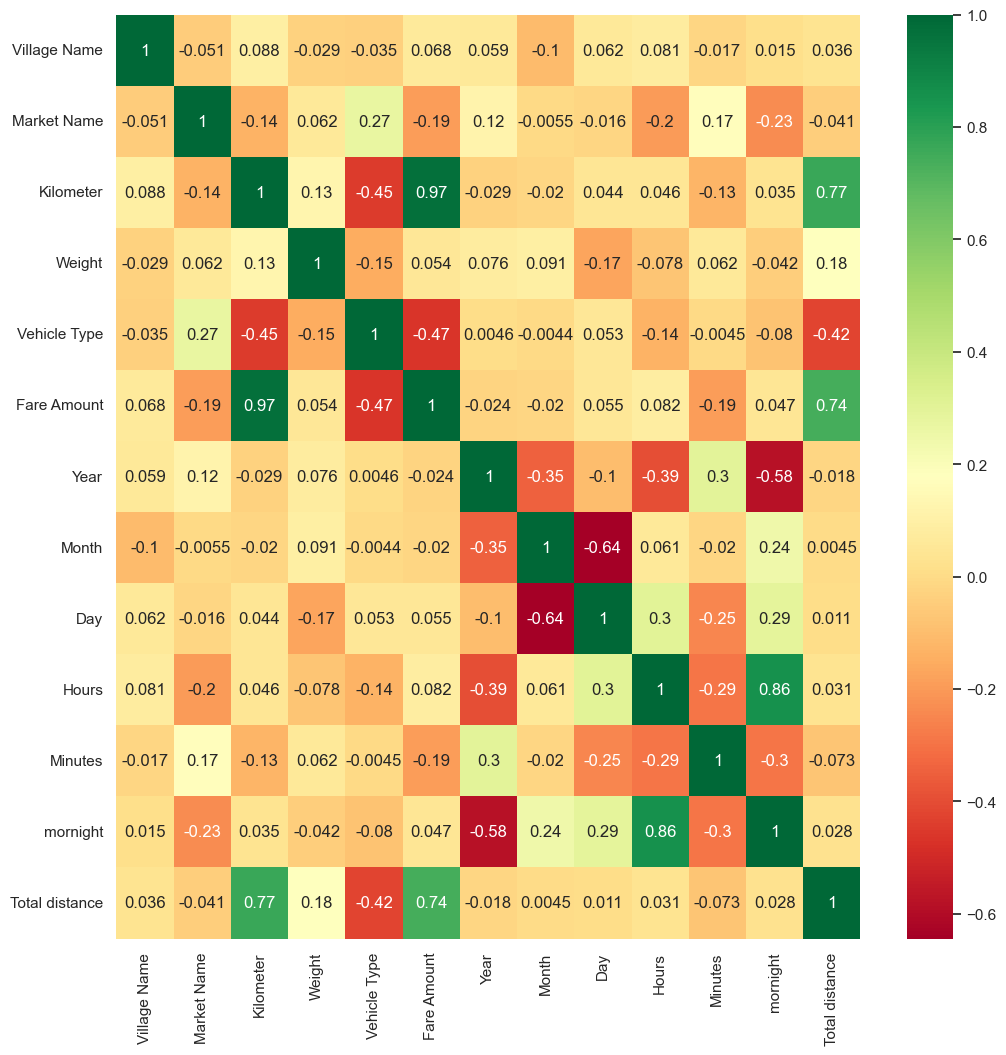

In [34]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (12,12))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [35]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [36]:
print(selection.feature_importances_)

[0.00305215 0.03776271 0.73850681 0.00579753 0.05430544 0.00389163
 0.00184162 0.00489357 0.00139385 0.01804992 0.00077519 0.12972958]


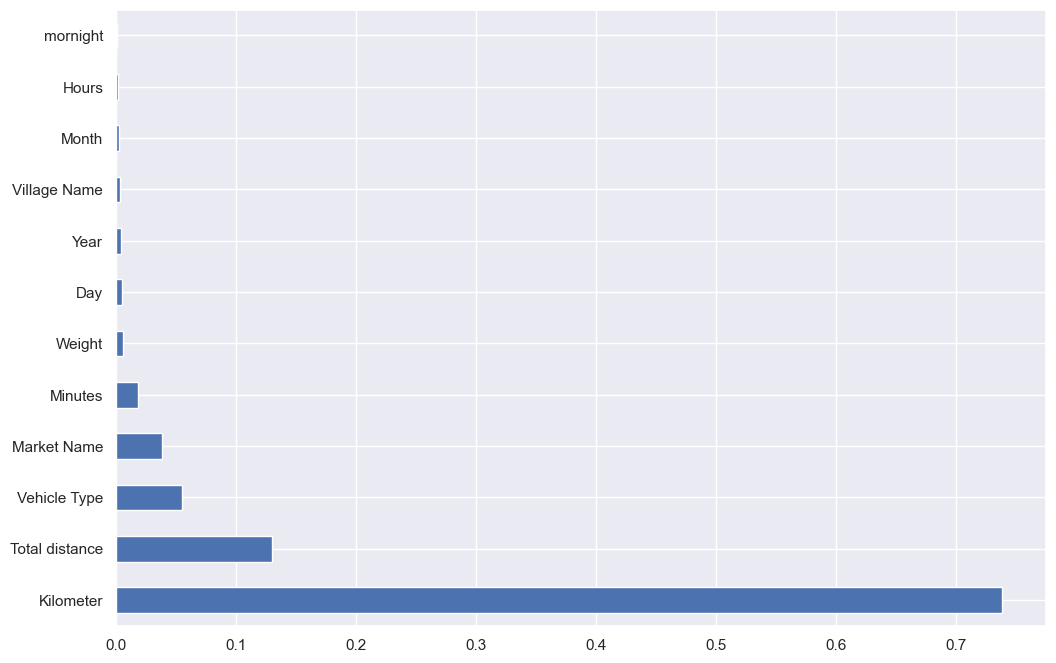

In [37]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

Fitting model using Random Forest

    1.Split dataset into train and test set in order to prediction w.r.t X_test
    2.If needed do scaling of data
        Scaling is not done in Random forest
    3.Import model
    4.Fit the data
    5.Predict w.r.t X_test
    6.In regression check RSME Score
    7.Plot graph

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
y_pred = reg_rf.predict(X_test)

In [41]:
reg_rf.score(X_train, y_train)

0.9886281851572574

In [42]:
reg_rf.score(X_test, y_test)

0.9697445057809763

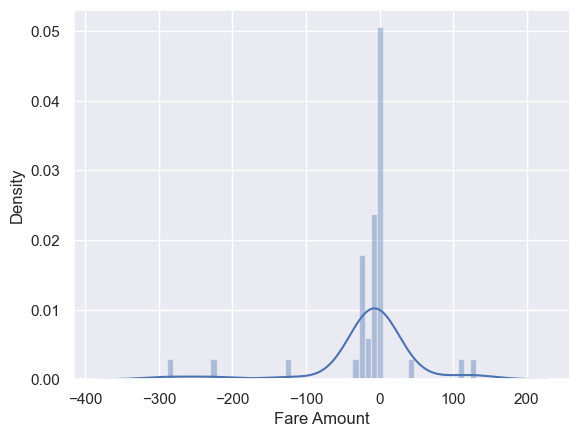

In [43]:
sns.distplot(y_test-y_pred)
plt.show()

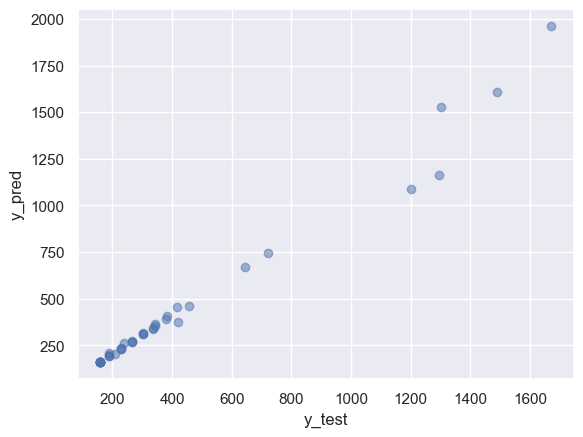

In [44]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [45]:
from sklearn import metrics

In [46]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 30.06325
MSE: 4653.279807500001
RMSE: 68.21495296120932


In [47]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.38044602365787084

In [48]:
metrics.r2_score(y_test, y_pred)

0.9697445057809763

Hyperparameter Tuning
    
    1.Choose following method for hyperparameter tuning
        1.1 RandomizedSearchCV --> Fast
        1.2 GridSearchCV
    2.Assign hyperparameters in form of dictionery
    3.Fit the model
    4.Check best paramters and best score

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [51]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [52]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs =1)

In [53]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [54]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [55]:
prediction = rf_random.predict(X_test)

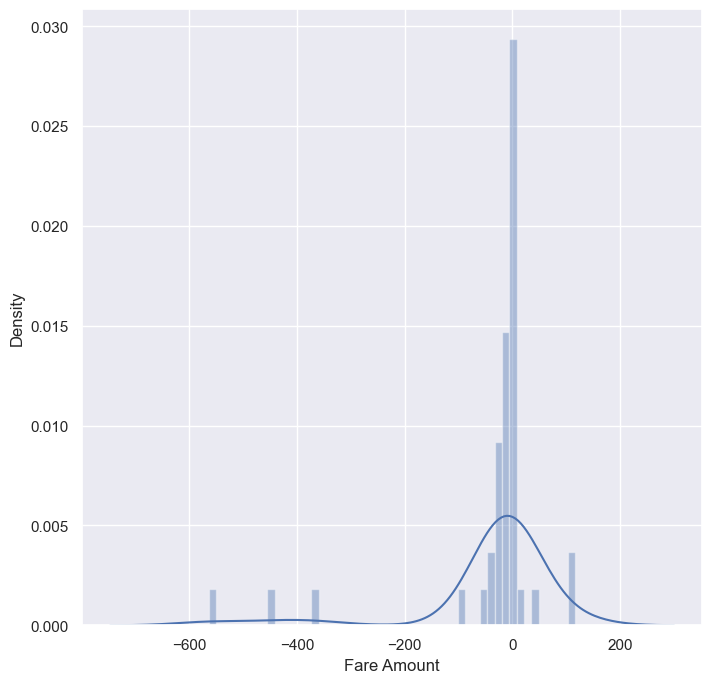

In [56]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

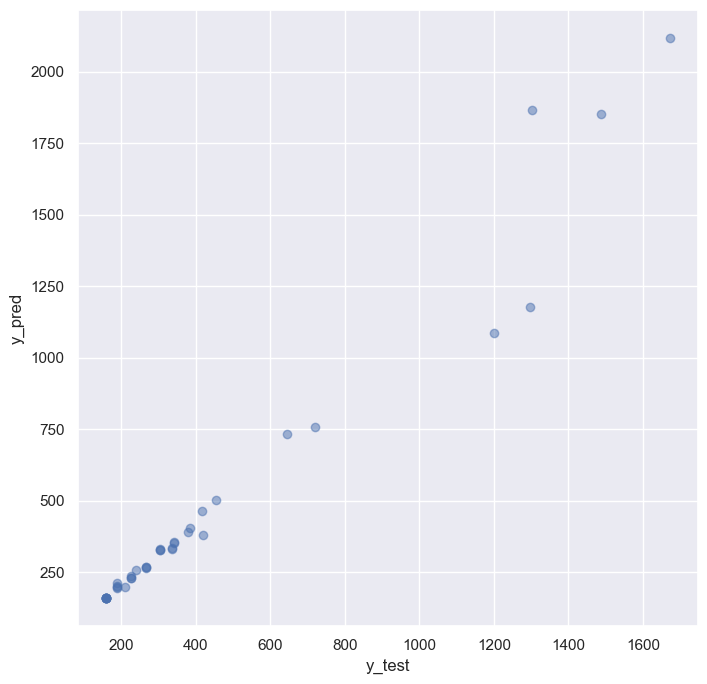

In [57]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 52.90904033209515
MSE: 17358.23614106063
RMSE: 131.75065897770924


### Save the model to reuse it again

In [59]:
import pickle
# open a file, where you ant to store the data
file = open('Act_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [60]:
model = open('Act_rf.pkl','rb')
forest = pickle.load(model)

In [61]:
y_prediction = forest.predict(X_test)

In [62]:
metrics.r2_score(y_test, y_prediction)

0.9697445057809763